In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [5]:
whale_returns_csv = Path("../Desktop/whale_returns.csv") 
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True) 
whale_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [7]:
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [9]:
whale_returns.dropna(inplace=True) 
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [6]:
#Algorithmic Daily Returns


In [19]:
algo_returns_csv = Path("../Desktop/algo_returns.csv") 
algo_pd = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True) 
algo_pd.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [11]:
algo_pd.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [20]:
algo_pd.dropna(inplace=True) 
algo_pd.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

# S&P 500 Returns

In [23]:
sp500_history_csv = Path("../Desktop/sp500_history.csv")
sp500_pd = pd.read_csv(sp500_history_csv,index_col="Date", parse_dates=True)
sp500_pd.head()

,Close
Date,
2019-04-23,"$2,933.68"
2019-04-22,"$2,907.97"
2019-04-18,"$2,905.03"
2019-04-17,"$2,900.45"
2019-04-16,"$2,907.06"


In [35]:
sp500_history.dtypes

Close    object
dtype: object

In [36]:
sp500_pd['Close'] = sp500_pd['Close'].str.replace('$','')
sp500_pd.head()


,Close
Date,
2019-04-23,"2,933.68"
2019-04-22,"2,907.97"
2019-04-18,"2,905.03"
2019-04-17,"2,900.45"
2019-04-16,"2,907.06"


In [38]:
sp500_pd['Close'] = sp500_pd['Close'].str.replace(',','')
sp500_pd.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [41]:
sp500_pd['Close'] = sp500_pd['Close'].astype(float)
sp500_pd.head()

sp500_pd["Close"] = sp500_pd["Close"].pct_change()
sp500_pd.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [44]:
sp500_daily_returns = sp500_pd.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,NaN
2019-04-18,-0.884637
2019-04-17,0.559400
2019-04-16,-2.445510


In [46]:
# Drop Nulls
sp500_pd.dropna(inplace=True)
sp500_pd.isnull().sum()

Close    0
dtype: int64

In [47]:
sp500_pd.columns = ["S&P 500"]
sp500_pd.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


# Combine all DF into one.

In [50]:
all_returns = pd.concat([whale_returns,sp500_pd,algo_pd], axis="columns", join="inner")
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,0.004408,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.001195,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.014378,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.017254,-0.005447,0.001303


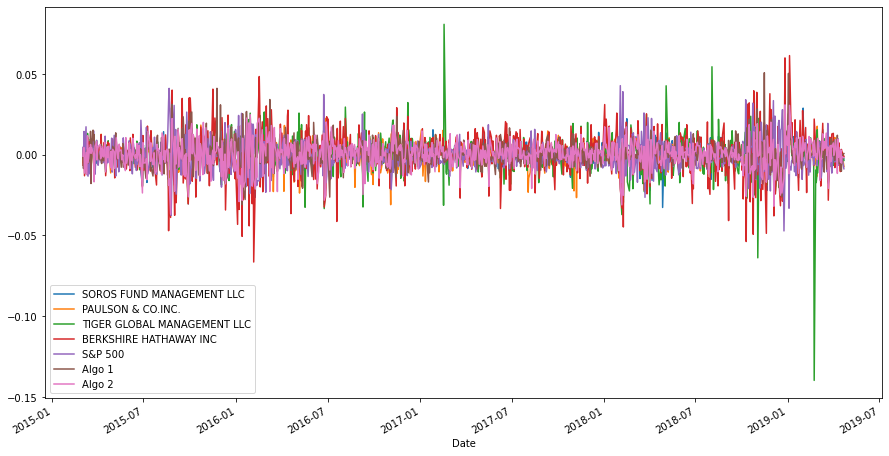

In [51]:
all_returns.plot(figsize=(15,8))

In [52]:
# Cumulative returns

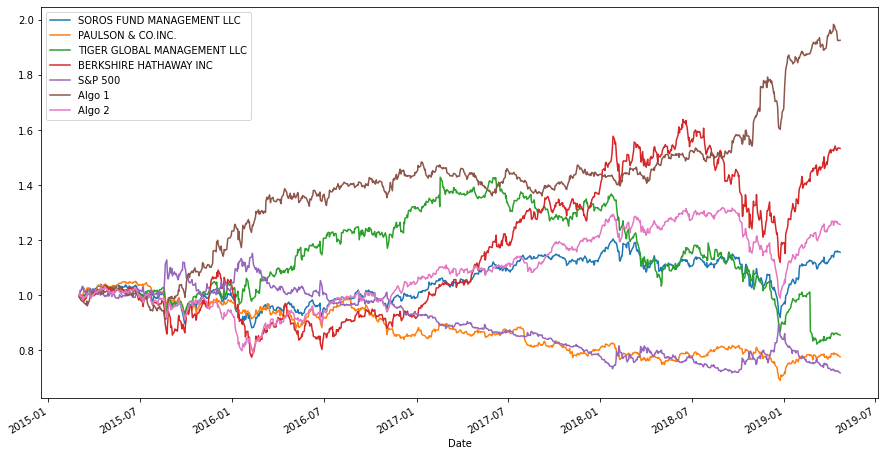

In [54]:
cumulative_returns = (1+all_returns).cumprod()
cumulative_returns.plot(figsize=(15,8))

# Risk

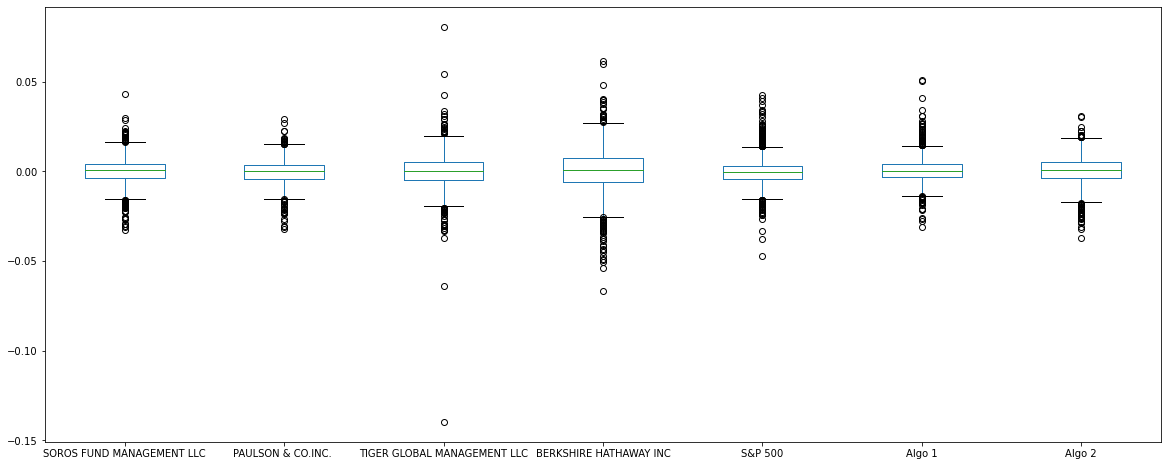

In [58]:
# Box Chart thing

all_returns.plot.box(figsize=(20,8))

In [60]:
daily_std = all_returns.std()
daily_std.head()

# WHERE IS ALGO 1 AND TWO????

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
S&P 500                        0.008587
dtype: float64

In [65]:
risk_greater = daily_std[daily_std > daily_std["S&P 500"]]
risk_greater

TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [62]:
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
S&P 500                        0.136313
Algo 1                         0.121006
Algo 2                         0.132413
dtype: float64

# Rolling Statistics

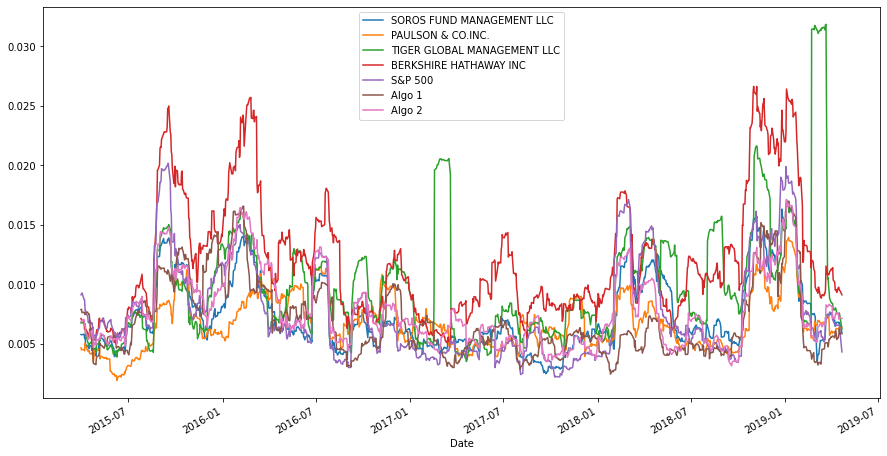

In [66]:
all_returns.rolling(window=21).std().plot(figsize=(15,8))

In [67]:
# Create correlation table

In [73]:
correlation = all_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.000574,0.320901,0.826730
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.013549,0.268631,0.678085
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,-0.001505,0.164114,0.507160
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,-0.013856,0.291678,0.687756
S&P 500,0.000574,0.013549,-0.001505,-0.013856,1.000000,-0.033963,-0.002192
Algo 1,0.320901,0.268631,0.164114,0.291678,-0.033963,1.000000,0.287852
Algo 2,0.826730,0.678085,0.507160,0.687756,-0.002192,0.287852,1.000000


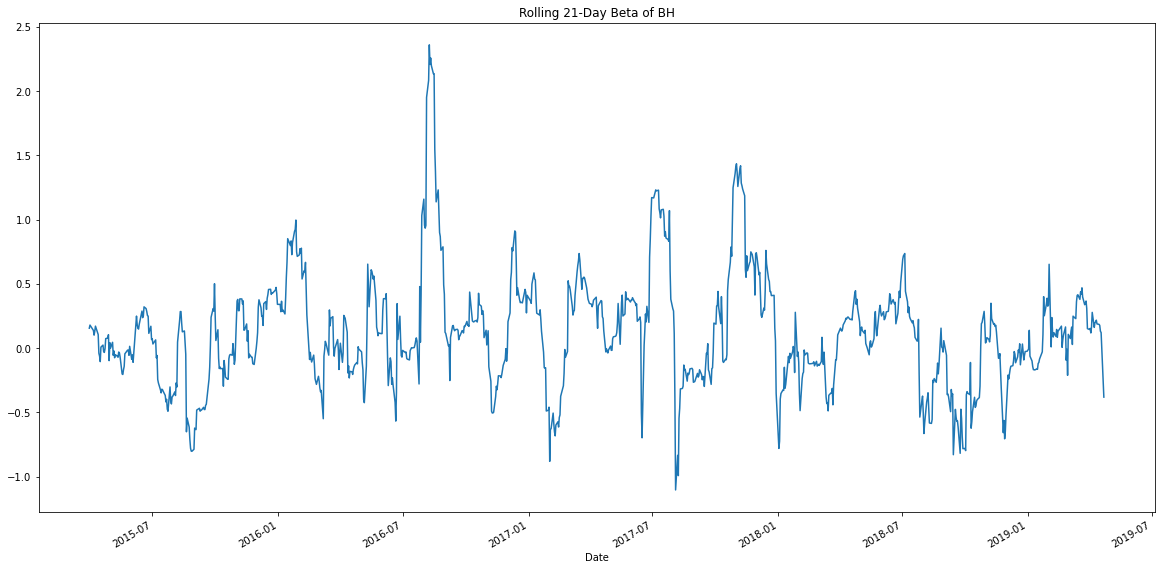

In [78]:
rolling_covariance = all_returns['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(all_returns['S&P 500'])
rolling_variance = all_returns['S&P 500'].rolling(window=21).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 21-Day Beta of BH')

# ???????

In [81]:
# Weighted moving average



rolling_beta.rolling(window=21).mean()

# Sharpe Ratios

In [84]:
sharpe_ratios = all_returns.mean()*252/(all_returns.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
S&P 500                       -0.518582
Algo 1                         1.369589
Algo 2                         0.484334
dtype: float64

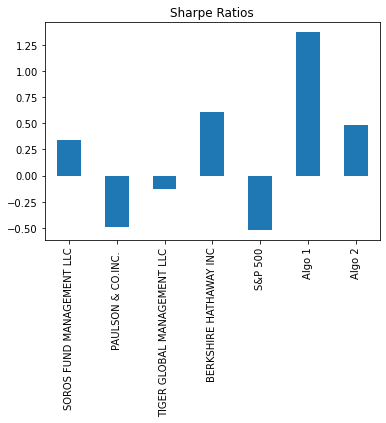

In [85]:
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

#### Algo 1 performed the best comparatively. 

# Portfolio Returns

In [108]:
#appl STOCK

aapl_history = pd.read_csv(Path("../Desktop/aapl_historical.csv"), index_col="Trade DATE", parse_dates = True, infer_datetime_format= True)
aapl_history.rename(columns = {"NOCP":"aapl"}, inplace = True)
aapl_history = aapl_history.drop(columns = ["Symbol"])
aapl_history.head()

,aapl
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [122]:
# goog STOCK

goog_history = pd.read_csv(Path("../Desktop/goog_historical.csv"), index_col="Trade DATE", parse_dates = True, infer_datetime_format= True)
goog_history.rename(columns = {"NOCP":"goog"}, inplace = True)
#goog_history.rename(columns = {"Trade DATE":"Date"}, inplace = True)
goog_history = goog_history.drop(columns = ["Symbol"])

#goog_history = goog_history.rename(columns = {"Trade DATE":"Date"}, inplace = True)

goog_history.head()

,goog
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [119]:
# cost STOCK

cost_history = pd.read_csv(Path("../Desktop/cost_historical.csv"), index_col="Trade DATE", parse_dates = True, infer_datetime_format= True)
cost_history.rename(columns = {"NOCP":"cost"}, inplace = True)
cost_history = cost_history.drop(columns = ["Symbol"])
cost_history.head()

,cost
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [124]:
# Joining Stocks together

In [126]:
my_stocks = pd.concat((aapl_history, cost_history, goog_history), axis = 1, join= "inner")
my_stocks.sort_index(ascending = True, inplace = True)
my_stocks.head()

,aapl,cost,goog
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [137]:
my_stocks.dropna(inplace=True)
#my_stocks.dropnull(inplace=True)
my_stocks.head(5)

,aapl,cost,goog
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [128]:
# Calculate the weighted returns

In [129]:
weights = [1/3, 1/3, 1/3]
my_portfolio = my_stocks.dot(weights)
my_portfolio_returns = my_portfolio.pct_change()
my_portfolio_returns.dropna(inplace = True)
my_portfolio_returns.head()

Trade DATE
2018-05-14    0.001093
2018-05-15   -0.015550
2018-05-16    0.005140
2018-05-17   -0.002370
2018-05-18   -0.009248
dtype: float64

In [131]:
portfolio_returns = pd.concat((my_portfolio_returns,all_returns), axis = 1, join = "inner")
portfolio_returns.rename(columns = {0:"my_portfolio"}, inplace = True)
portfolio_returns

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
2018-05-14,0.001093,0.000000,0.000000,0.000000,0.000000,0.006889,0.000915,0.001635
2018-05-15,-0.015550,-0.000726,-0.001409,-0.003189,-0.014606,-0.004044,-0.001135,-0.001139
2018-05-16,0.005140,0.008637,0.006244,0.005480,0.004310,0.000857,-0.002326,0.003341
2018-05-17,-0.002370,-0.001955,0.002524,-0.006267,-0.005140,0.002639,-0.006949,0.005205
2018-05-18,-0.009248,-0.004357,-0.002672,-0.012832,-0.002212,-0.007333,0.002557,-0.002496
...,...,...,...,...,...,...,...,...
2019-04-15,0.004805,-0.001422,-0.001156,0.000398,-0.010492,-0.000509,-0.004331,-0.004572
2019-04-16,0.003036,0.002699,0.000388,-0.000831,0.000837,0.002279,-0.006945,0.002899
2019-04-17,0.007962,-0.002897,-0.006467,-0.004409,0.003222,-0.001577,-0.010301,-0.005228
2019-04-18,0.000599,0.001448,0.001222,0.000582,0.001916,-0.001011,-0.000588,-0.001229


In [132]:
portfolio_returns.dropna(inplace=True)
portfolio_returns

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
2018-05-14,0.001093,0.000000,0.000000,0.000000,0.000000,0.006889,0.000915,0.001635
2018-05-15,-0.015550,-0.000726,-0.001409,-0.003189,-0.014606,-0.004044,-0.001135,-0.001139
2018-05-16,0.005140,0.008637,0.006244,0.005480,0.004310,0.000857,-0.002326,0.003341
2018-05-17,-0.002370,-0.001955,0.002524,-0.006267,-0.005140,0.002639,-0.006949,0.005205
2018-05-18,-0.009248,-0.004357,-0.002672,-0.012832,-0.002212,-0.007333,0.002557,-0.002496
...,...,...,...,...,...,...,...,...
2019-04-15,0.004805,-0.001422,-0.001156,0.000398,-0.010492,-0.000509,-0.004331,-0.004572
2019-04-16,0.003036,0.002699,0.000388,-0.000831,0.000837,0.002279,-0.006945,0.002899
2019-04-17,0.007962,-0.002897,-0.006467,-0.004409,0.003222,-0.001577,-0.010301,-0.005228
2019-04-18,0.000599,0.001448,0.001222,0.000582,0.001916,-0.001011,-0.000588,-0.001229


In [133]:
portfolio_std = pd.DataFrame(portfolio_returns.std()).rename(columns = {0:"std"})
portfolio_std

,std
my_portfolio,0.014424
SOROS FUND MANAGEMENT LLC,0.009248
PAULSON & CO.INC.,0.007366
TIGER GLOBAL MANAGEMENT LLC,0.014671
BERKSHIRE HATHAWAY INC,0.015579
S&P 500,0.009605
Algo 1,0.008437
Algo 2,0.008788


In [138]:
# Re Roll the risk 21 STD

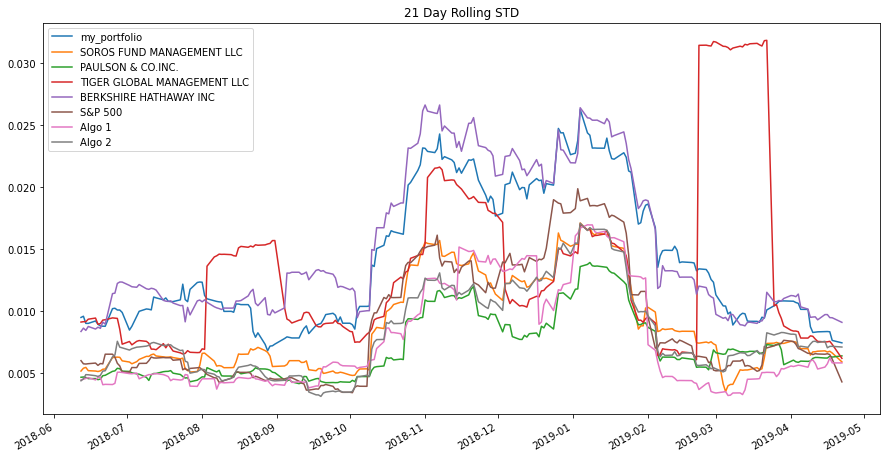

In [142]:
#all_returns.rolling(window=21).std().plot(figsize=(15,8))
portfolio_returns.rolling(window=21).std().plot(figsize=(15,8), title=("21 Day Rolling STD"))



In [143]:
trading_days1 = portfolio_returns.count()
sharpe_ratios1 = portfolio_returns.mean()*trading_days1/(portfolio_returns.std()*np.sqrt(trading_days1))

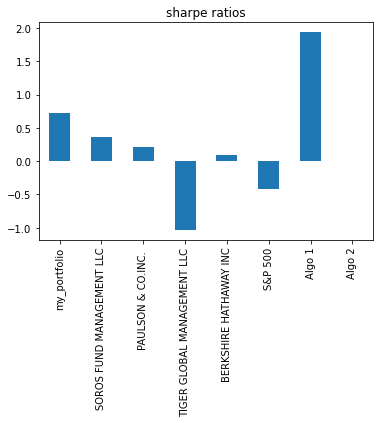

In [144]:
sharpe_ratios1.plot(kind = 'bar', title = "sharpe ratios")

In [146]:
correlation1 = portfolio_returns.corr()
correlation1

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
my_portfolio,1.000000,0.723517,0.605988,0.339457,0.840688,-0.022497,0.274654,0.724694
SOROS FUND MANAGEMENT LLC,0.723517,1.000000,0.791802,0.477844,0.816197,-0.028256,0.336909,0.862583
PAULSON & CO.INC.,0.605988,0.791802,1.000000,0.484869,0.650390,-0.059862,0.360727,0.783865
TIGER GLOBAL MANAGEMENT LLC,0.339457,0.477844,0.484869,1.000000,0.324306,0.005881,0.113671,0.408402
BERKSHIRE HATHAWAY INC,0.840688,0.816197,0.650390,0.324306,1.000000,-0.038832,0.325985,0.782054
S&P 500,-0.022497,-0.028256,-0.059862,0.005881,-0.038832,1.000000,-0.054478,-0.042540
Algo 1,0.274654,0.336909,0.360727,0.113671,0.325985,-0.054478,1.000000,0.364457
Algo 2,0.724694,0.862583,0.783865,0.408402,0.782054,-0.042540,0.364457,1.000000


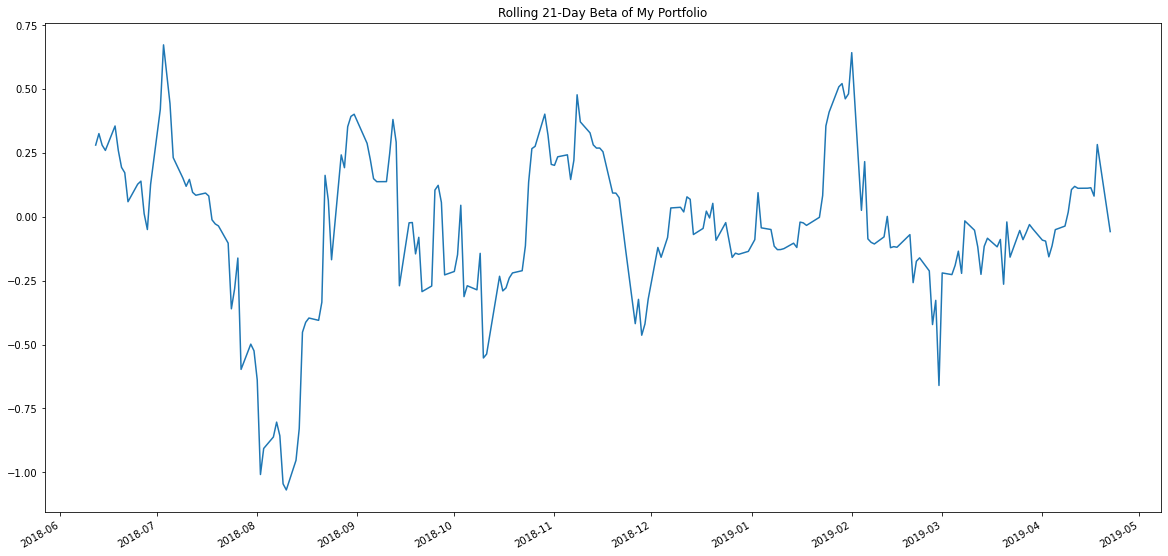

In [148]:
rolling_covariance1 = portfolio_returns['my_portfolio'].rolling(window=21).cov(portfolio_returns['S&P 500'])
rolling_variance1 = portfolio_returns['S&P 500'].rolling(window=21).var()
rolling_beta1 = rolling_covariance1 / rolling_variance1
rolling_beta1.plot(figsize=(20, 10), title='Rolling 21-Day Beta of My Portfolio')

#### My portfolio ismore correlated to Berkshire Hathaway.